<h1><center>Performance Assessment Task 1 - Linear Regression Modeling</center></h1>
<h3><center> by Bader Ale <center><h3>

# ▶ Research Question
Our research questions is as follows: __What caused the highest amount of total charges to the patient during their stay__.

In [1]:
# Importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell # Importing so we can run multiple lines in one cell
InteractiveShell.ast_node_interactivity = "all" # Code so multiple lines in one cell can be ran simultaenously 

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing origiginal dataset
df = pd.read_csv('F:\GitHub Repos\WGU_MSDA\D208_Predictive Modeling\medical_clean.csv')

# ▶ Data Cleaning  

Target variable for task 1:  __*TotalCharge*__  
Explanatory variable(s) for task 1: __*State*__  , __*Age*__  , __*Income*__  , __*Gender*__, __*Initial_Admin*__  , __*Complication_Risk*__  , __*Services*__ , __*Initial_Days*__  

In [3]:
# Showing first 5 records
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,America/Chicago,"Psychologist, sport and exercise",1,53,86575.93,Divorced,Male,No,19.141466,6,0,0,No,Emergency Admission,Yes,No,Medium,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood Work,10.585770,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,America/Chicago,Community development worker,3,51,46805.99,Married,Female,No,18.940352,4,2,1,No,Emergency Admission,Yes,No,High,Yes,No,No,No,No,No,No,Yes,No,Intravenous,15.129562,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,America/Chicago,Chief Executive Officer,3,53,14370.14,Widowed,Female,No,18.057507,4,1,0,No,Elective Admission,Yes,No,Medium,Yes,No,Yes,No,No,No,No,No,No,Blood Work,4.772177,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,America/Chicago,Early years teacher,0,78,39741.49,Married,Male,No,16.576858,4,1,0,No,Elective Admission,No,Yes,Medium,No,Yes,No,No,No,No,No,Yes,Yes,Blood Work,1.714879,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,America/New_York,Health promotion specialist,1,22,1209.56,Widowed,Female,No,17.439069,5,0,2,Yes,Elective Admission,No,No,Low,No,No,No,Yes,No,No,Yes,No,No,CT Scan,1.254807,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [4]:
# Creating new dataframe with only those variables of interest
df_model = df[['State', 'Age', 'Income', 'Gender', 'Doc_visits', 'Initial_admin', 'Complication_risk', 'Services', 'Initial_days', 'TotalCharge']]

## Detection and Treatment of Nulls

In [5]:
# Getting number of rows and columns
df_model.shape

(10000, 10)

In [6]:
# Checking for null values
df_model.isnull().sum()

State                0
Age                  0
Income               0
Gender               0
Doc_visits           0
Initial_admin        0
Complication_risk    0
Services             0
Initial_days         0
TotalCharge          0
dtype: int64

Here we can see there are no Nulls in our new dataframe

## Detection and Treatment of Duplicated Values

In [7]:
# Checking for duplicates
df_model.duplicated().value_counts()

False    10000
dtype: int64

The output shows 10000 records as being False, therefore we do not have any duplicated values.

## Detection and Treatment of Outliers

In [8]:
# Checking datatypes for all variables in new dataframe
df_model.dtypes

State                 object
Age                    int64
Income               float64
Gender                object
Doc_visits             int64
Initial_admin         object
Complication_risk     object
Services              object
Initial_days         float64
TotalCharge          float64
dtype: object

We will first focus on the continuous variables and analyze, if any, the outliers. We will normalize our data for ease of visual interpretation

In [9]:
# Performing normalization on the continuous variables for the new dataframe
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df_model[['Age', 'Income', 'Doc_visits', 'Initial_days', 'TotalCharge']]) # Selecting only those numerical variables in our new dataframe
scaled = scaler.fit_transform(df_model[['Age', 'Income', 'Doc_visits', 'Initial_days', 'TotalCharge']])
scaled_df_model = pd.DataFrame(scaled, columns = ('Age', 'Income', 'Doc_visits', 'Initial_days', 'TotalCharge')) # Creating a new dataframe for visualization


MinMaxScaler()

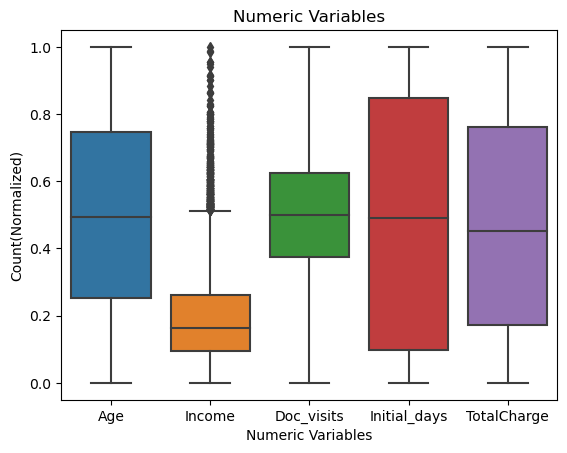

In [23]:
# Plotting the normalized, numerical data 
sns.boxplot(scaled_df_model)
plt.title('Numeric Variables')
plt.ylabel('Count(Normalized)')
plt.xlabel('Numeric Variables');

We can see Income is the only numeric variable with outliers. We will use z-scores greater than 3 to eliminate those outliers

In [11]:
# Importing SciPy library
import scipy.stats as stats

In [12]:
# Creating a new column for the Income z-scores
df_model['Income_z_Scores'] = stats.zscore(df_model['Income'])

In [13]:
# Creating a new dataframe with extracted Income outliers
df_model2 = df_model[(df_model['Income_z_Scores'] > -3) & (df_model['Income_z_Scores'] < 3)]

In [14]:
df_model2.head()

,State,Age,Income,Gender,Doc_visits,Initial_admin,Complication_risk,Services,Initial_days,TotalCharge,Income_z_Scores
0,AL,53,86575.93,Male,6,Emergency Admission,Medium,Blood Work,10.585770,3726.702860,1.615914
1,FL,51,46805.99,Female,4,Emergency Admission,High,Intravenous,15.129562,4193.190458,0.221443
2,SD,53,14370.14,Female,4,Elective Admission,Medium,Blood Work,4.772177,2434.234222,-0.915870
3,MN,78,39741.49,Male,4,Elective Admission,Medium,Blood Work,1.714879,2127.830423,-0.026263
4,VA,22,1209.56,Female,5,Elective Admission,Low,CT Scan,1.254807,2113.073274,-1.377325


In [15]:
# Dropping the Income_z_Scores columns since
# we won't need it anymore
df_model2.drop(['Income_z_Scores'], axis=1, inplace=True)

In [16]:
# Checking for Income_z_Score column drop
df_model2.head()

,State,Age,Income,Gender,Doc_visits,Initial_admin,Complication_risk,Services,Initial_days,TotalCharge
0,AL,53,86575.93,Male,6,Emergency Admission,Medium,Blood Work,10.585770,3726.702860
1,FL,51,46805.99,Female,4,Emergency Admission,High,Intravenous,15.129562,4193.190458
2,SD,53,14370.14,Female,4,Elective Admission,Medium,Blood Work,4.772177,2434.234222
3,MN,78,39741.49,Male,4,Elective Admission,Medium,Blood Work,1.714879,2127.830423
4,VA,22,1209.56,Female,5,Elective Admission,Low,CT Scan,1.254807,2113.073274


# ▶ Exploratory Data Analysis  

In [17]:
# Summary Statistics
df_model2.describe()

,Age,Income,Doc_visits,Initial_days,TotalCharge
count,9857.000000,9857.000000,9857.000000,9857.000000,9857.000000
mean,53.537283,38908.927266,5.010855,34.483667,5314.860400
std,20.633456,25392.839109,1.043972,26.305266,2180.227407
min,18.000000,154.080000,1.000000,1.001981,1938.312067
25%,36.000000,19370.980000,4.000000,7.912315,3181.679327
50%,53.000000,33292.200000,5.000000,36.270750,5252.764000
75%,71.000000,53275.410000,6.000000,61.170620,7460.305000
max,89.000000,125977.370000,9.000000,71.981490,9180.728000


In [18]:
df_model2.dtypes

State                 object
Age                    int64
Income               float64
Gender                object
Doc_visits             int64
Initial_admin         object
Complication_risk     object
Services              object
Initial_days         float64
TotalCharge          float64
dtype: object

## Univariate Analysis  
### Numeric Variables

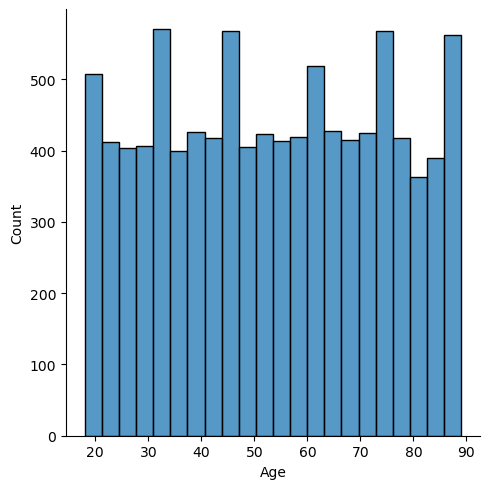

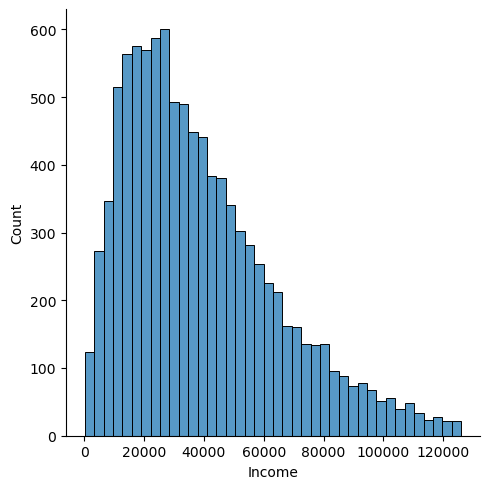

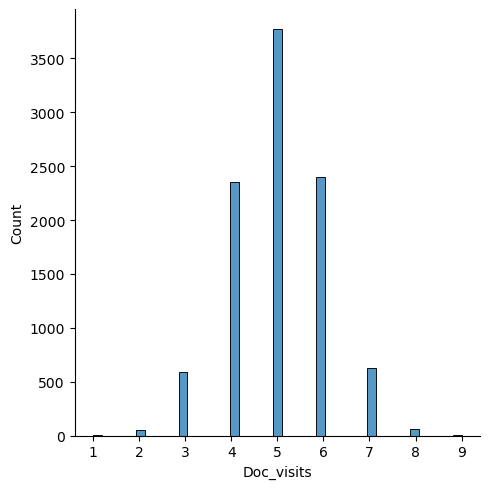

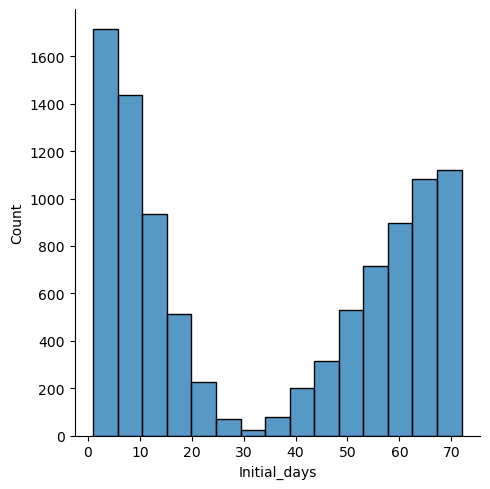

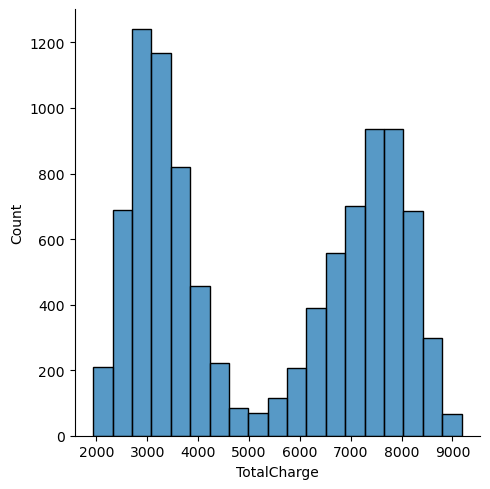

In [19]:
# Univariate analysis visualizations for numerical variables
sns.displot(df_model2['Age']);
sns.displot(df_model2['Income']);
sns.displot(df_model2['Doc_visits']);
sns.displot(df_model2['Initial_days']);
sns.displot(df_model2['TotalCharge']);

### Categorical Variables

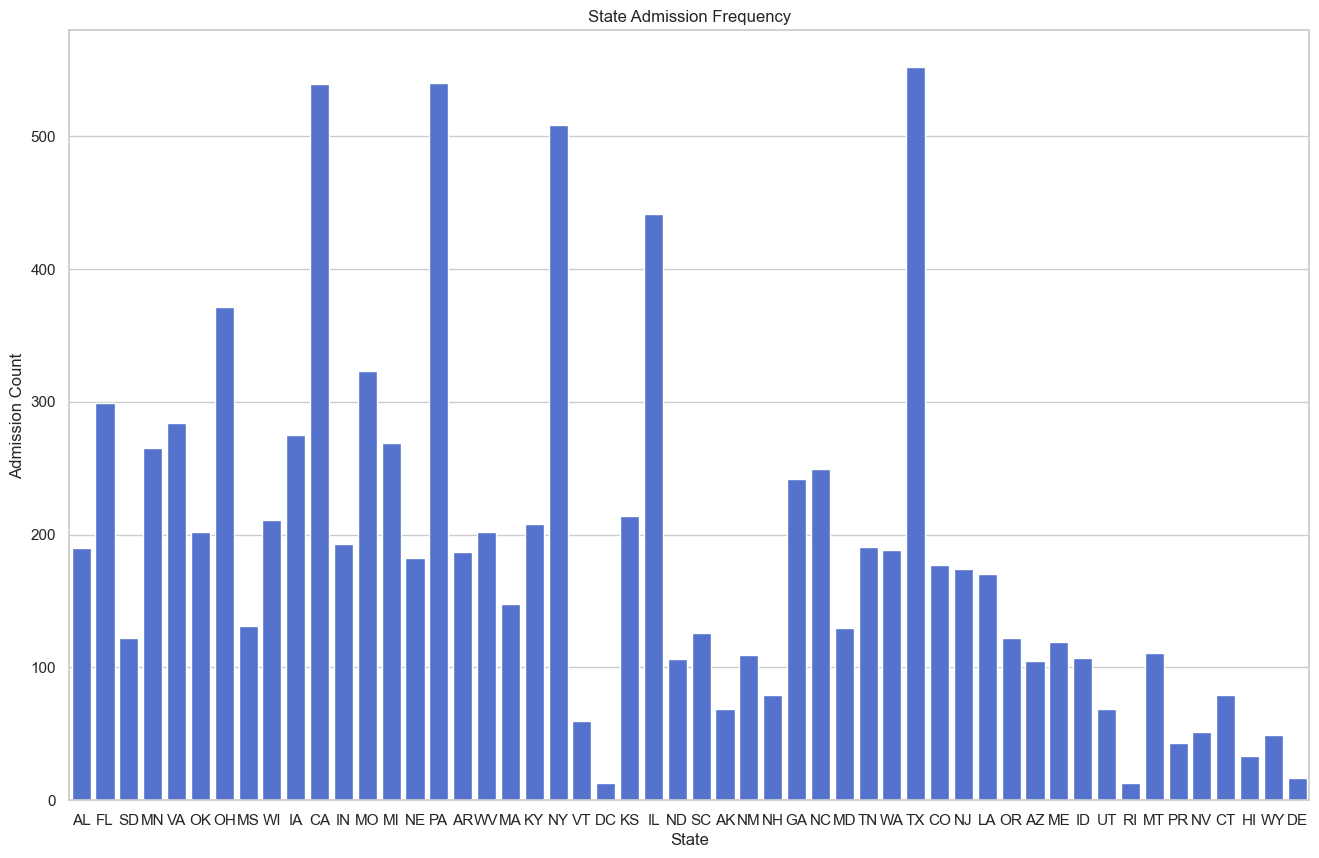

In [31]:
# State Countplont
sns.set_theme(style='whitegrid')
sns.countplot(df_model2, x='State',color='royalblue')
plt.title('Admission Rates by State')
plt.ylabel('Admission Count')
fig = plt.gcf()
fig.set_size_inches(16, 10);

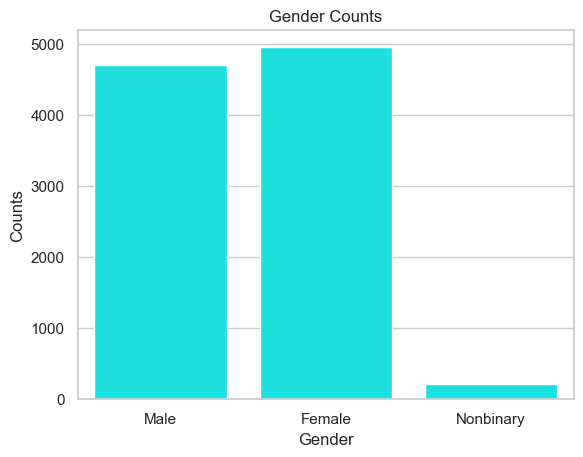

In [48]:
# Gender Countplot
sns.countplot(df_model2, x='Gender',color='aqua')
plt.title('Gender Counts')
plt.ylabel('Counts');

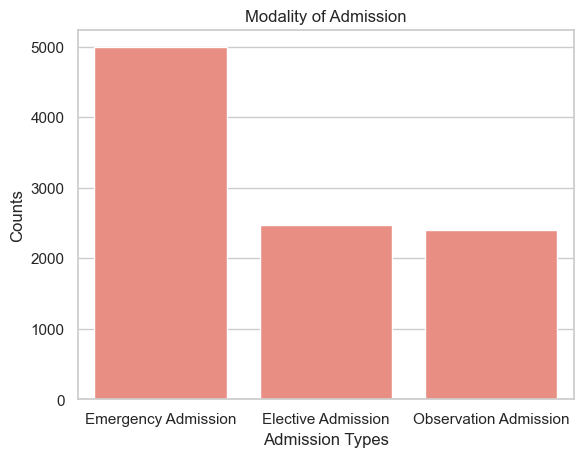

In [49]:
# Initial_admin Countplot
sns.countplot(df_model2, x='Initial_admin',color='salmon')
plt.title('Modality of Admission')
plt.xlabel('Admission Types')
plt.ylabel('Counts');

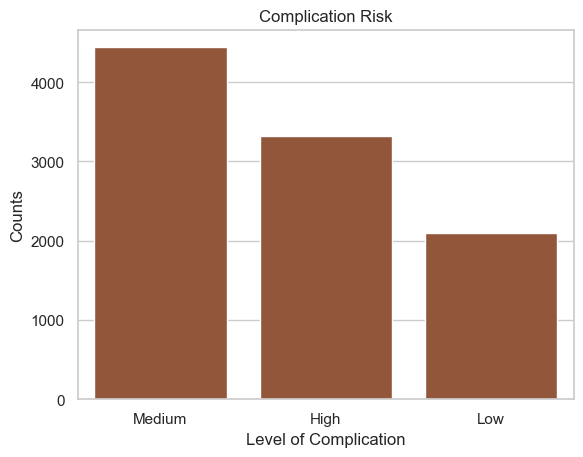

In [51]:
# Complication Risk Countplot
sns.countplot(df_model2, x='Complication_risk',color='sienna')
plt.title('Complication Risk')
plt.xlabel('Level of Complication')
plt.ylabel('Counts');

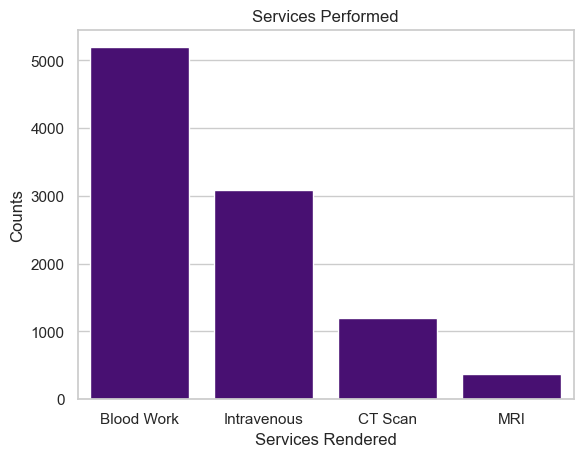

In [54]:
# Services Countplot
sns.countplot(df_model2, x='Services',color='indigo')
plt.title('Services Performed')
plt.xlabel('Services Rendered')
plt.ylabel('Counts');